In [1]:
from sklearn.base import BaseEstimator, ClassifierMixin

class PyTorchClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, device):
        self.model = model
        self.device = device

    def fit(self, X, y):
        # PyTorch models are already trained, so we don't need to do anything here
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X).to(self.device)
            outputs = self.model(X_tensor).logits
            return torch.argmax(outputs, dim=1).cpu().numpy()

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)
    
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(6, 4))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")

    return axes

In [2]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curve(y_true, y_pred_proba, label_encoder, model_name):
    n_classes = len(label_encoder.classes_)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(6, 4))
    colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))
    
    for i, color in zip(range(n_classes), colors):
        class_name = label_encoder.classes_[i]
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of {class_name} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title(f'ROC Curve - {model_name}', fontsize=10)
    plt.legend(loc="lower right", fontsize=8)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Training and evaluating model: distilbert-base-uncased


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'pre_classifi

Epoch 1, Average Loss: 1.2393, Average Accuracy: 0.5965
Epoch 2, Average Loss: 0.5444, Average Accuracy: 0.8170
Epoch 3, Average Loss: 0.4044, Average Accuracy: 0.8618
Epoch 4, Average Loss: 0.3446, Average Accuracy: 0.8843
Epoch 5, Average Loss: 0.3126, Average Accuracy: 0.8953
Epoch 6, Average Loss: 0.2914, Average Accuracy: 0.9003
Epoch 7, Average Loss: 0.2789, Average Accuracy: 0.9022
Epoch 8, Average Loss: 0.2657, Average Accuracy: 0.9047
Epoch 9, Average Loss: 0.2525, Average Accuracy: 0.9087
Epoch 10, Average Loss: 0.2416, Average Accuracy: 0.9125
Testing - Accuracy: 0.8613569321533924
Testing - Precision: 0.8585543723162828
Testing - Recall 0.8613569321533924
Testing - F1 Score 0.8549145909645727


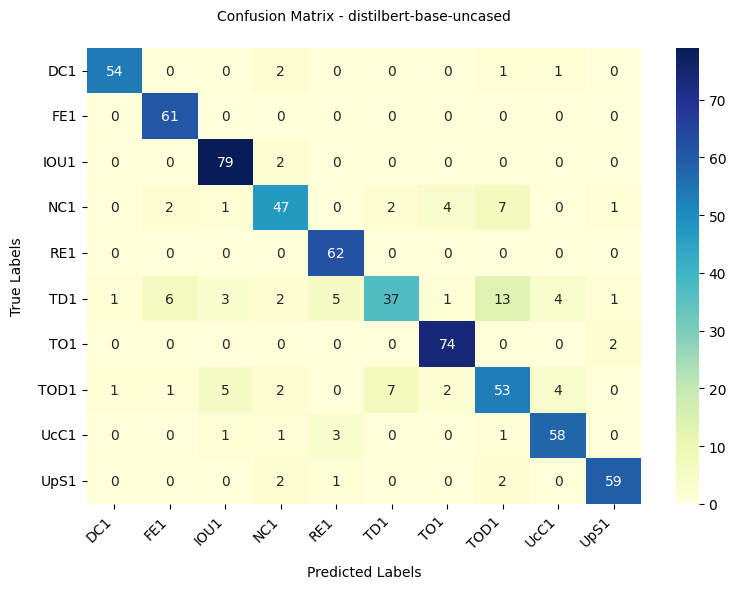

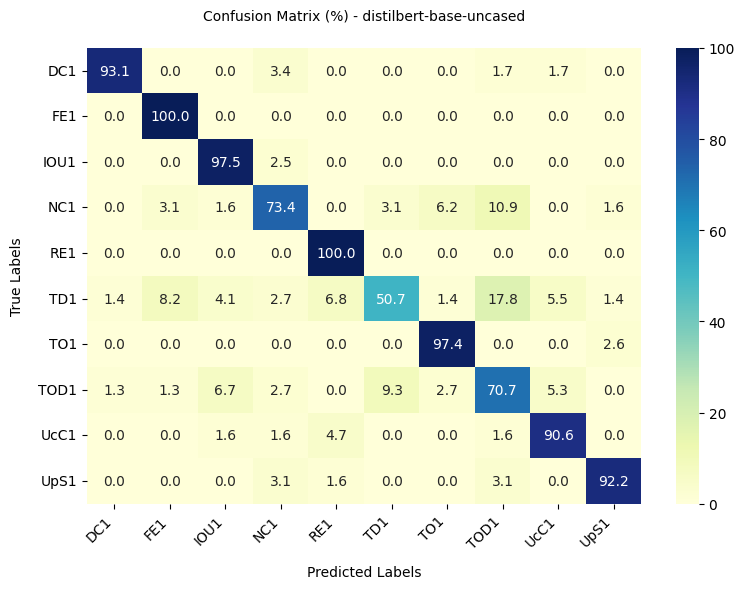

Class 0 - Precision: 0.9642857142857143, Recall: 0.9310344827586207, F1 Score: 0.9473684210526316, Accuracy: 0.9310344827586207
Class 1 - Precision: 0.8714285714285714, Recall: 1.0, F1 Score: 0.9312977099236641, Accuracy: 1.0
Class 2 - Precision: 0.8876404494382022, Recall: 0.9753086419753086, F1 Score: 0.9294117647058824, Accuracy: 0.9753086419753086
Class 3 - Precision: 0.8103448275862069, Recall: 0.734375, F1 Score: 0.7704918032786885, Accuracy: 0.734375
Class 4 - Precision: 0.8732394366197183, Recall: 1.0, F1 Score: 0.9323308270676691, Accuracy: 1.0
Class 5 - Precision: 0.8043478260869565, Recall: 0.5068493150684932, F1 Score: 0.6218487394957983, Accuracy: 0.5068493150684932
Class 6 - Precision: 0.9135802469135803, Recall: 0.9736842105263158, F1 Score: 0.9426751592356687, Accuracy: 0.9736842105263158
Class 7 - Precision: 0.6883116883116883, Recall: 0.7066666666666667, F1 Score: 0.6973684210526315, Accuracy: 0.7066666666666667
Class 8 - Precision: 0.8656716417910447, Recall: 0.90625

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/tmp/ipykernel_710171/3784454423.py", line 20, in score
    y_pred = self.predict(X)
  File "/tmp/ipykernel_710171/3784454423.py", line 16, in predict
    outputs = self.model(X_tensor).logits
  File "/home/islab-ai/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/islab-ai/.local/lib/python3.8/site-packages/transformers/models/distilbert/modeling_di

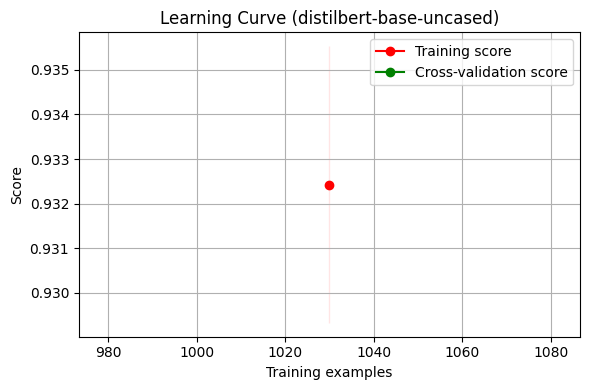

/tmp/ipykernel_710171/3999779995.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


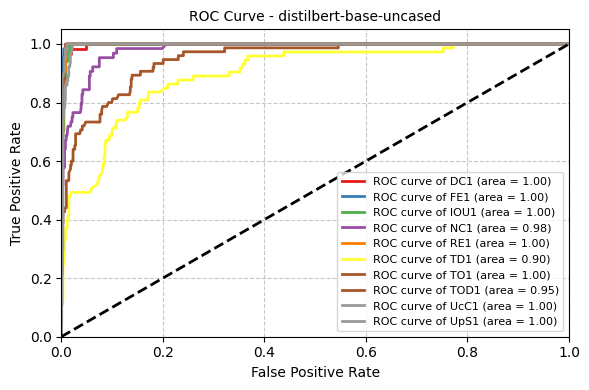


Training and evaluating model: huggingface/prunebert-base-uncased-6-finepruned-w-distil-mnli


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huggingface/prunebert-base-uncased-6-finepruned-w-distil-mnli and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([10]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Average Loss: 1.5194, Average Accuracy: 0.4811
Epoch 2, Average Loss: 0.7695, Average Accuracy: 0.7477
Epoch 3, Average Loss: 0.5400, Average Accuracy: 0.8219
Epoch 4, Average Loss: 0.4472, Average Accuracy: 0.8490
Epoch 5, Average Loss: 0.3768, Average Accuracy: 0.8729
Epoch 6, Average Loss: 0.3378, Average Accuracy: 0.8876
Epoch 7, Average Loss: 0.3110, Average Accuracy: 0.8937
Epoch 8, Average Loss: 0.2891, Average Accuracy: 0.9038
Epoch 9, Average Loss: 0.2701, Average Accuracy: 0.9092
Epoch 10, Average Loss: 0.2568, Average Accuracy: 0.9115
Testing - Accuracy: 0.8746312684365781
Testing - Precision: 0.8705921485639355
Testing - Recall 0.8746312684365781
Testing - F1 Score 0.8688740492966625


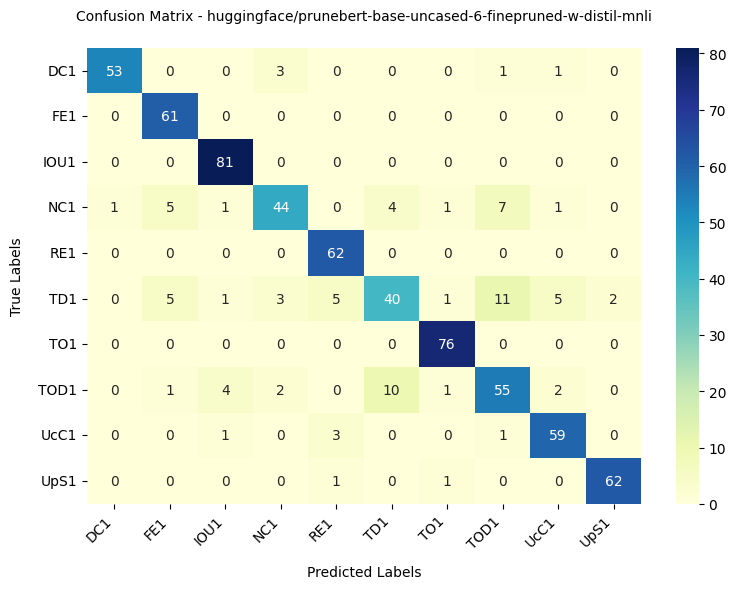

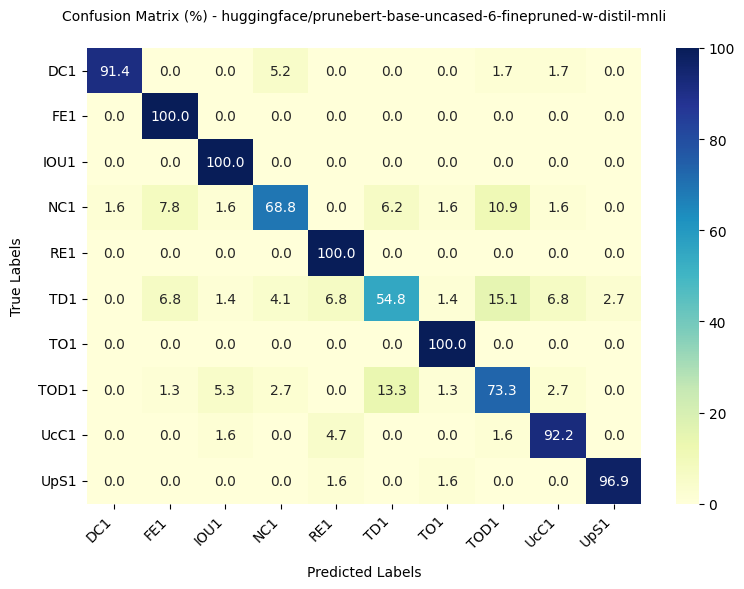

Class 0 - Precision: 0.9814814814814816, Recall: 0.9137931034482759, F1 Score: 0.9464285714285714, Accuracy: 0.9137931034482759
Class 1 - Precision: 0.8472222222222222, Recall: 1.0, F1 Score: 0.9172932330827067, Accuracy: 1.0
Class 2 - Precision: 0.9204545454545453, Recall: 1.0, F1 Score: 0.9585798816568047, Accuracy: 1.0
Class 3 - Precision: 0.8461538461538461, Recall: 0.6875, F1 Score: 0.7586206896551724, Accuracy: 0.6875
Class 4 - Precision: 0.8732394366197183, Recall: 1.0, F1 Score: 0.9323308270676691, Accuracy: 1.0
Class 5 - Precision: 0.7407407407407407, Recall: 0.547945205479452, F1 Score: 0.6299212598425197, Accuracy: 0.547945205479452
Class 6 - Precision: 0.9500000000000001, Recall: 1.0, F1 Score: 0.9743589743589742, Accuracy: 1.0
Class 7 - Precision: 0.7333333333333333, Recall: 0.7333333333333333, F1 Score: 0.7333333333333333, Accuracy: 0.7333333333333333
Class 8 - Precision: 0.8676470588235294, Recall: 0.921875, F1 Score: 0.893939393939394, Accuracy: 0.921875
Class 9 - Preci

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/tmp/ipykernel_710171/3784454423.py", line 20, in score
    y_pred = self.predict(X)
  File "/tmp/ipykernel_710171/3784454423.py", line 16, in predict
    outputs = self.model(X_tensor).logits
  File "/home/islab-ai/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/islab-ai/.local/lib/python3.8/site-packages/transformers/models/bert/modeling_bert.py"

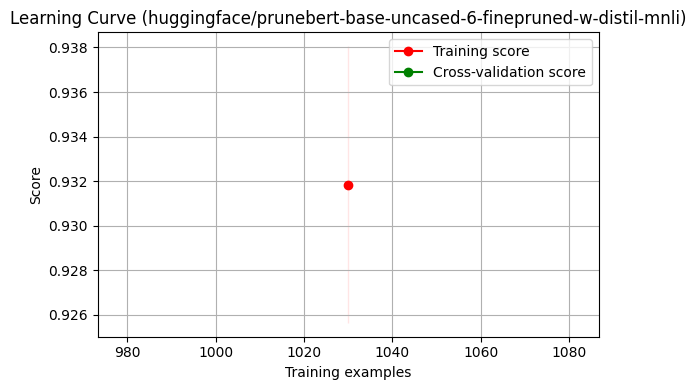

/tmp/ipykernel_710171/3999779995.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


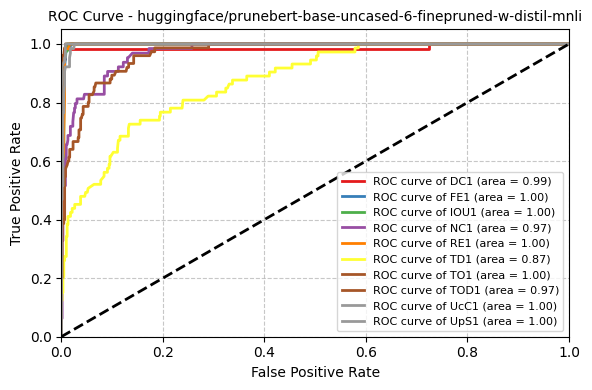


Training and evaluating model: distilbert-base-uncased-finetuned-sst-2-english


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([10]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Average Loss: 1.2504, Average Accuracy: 0.5998
Epoch 2, Average Loss: 0.5385, Average Accuracy: 0.8217
Epoch 3, Average Loss: 0.3960, Average Accuracy: 0.8681
Epoch 4, Average Loss: 0.3304, Average Accuracy: 0.8876
Epoch 5, Average Loss: 0.2971, Average Accuracy: 0.8977
Epoch 6, Average Loss: 0.2727, Average Accuracy: 0.9076
Epoch 7, Average Loss: 0.2523, Average Accuracy: 0.9131
Epoch 8, Average Loss: 0.2402, Average Accuracy: 0.9166
Epoch 9, Average Loss: 0.2276, Average Accuracy: 0.9189
Epoch 10, Average Loss: 0.2188, Average Accuracy: 0.9230
Testing - Accuracy: 0.8672566371681416
Testing - Precision: 0.8655437061515465
Testing - Recall 0.8672566371681416
Testing - F1 Score 0.86089320067869


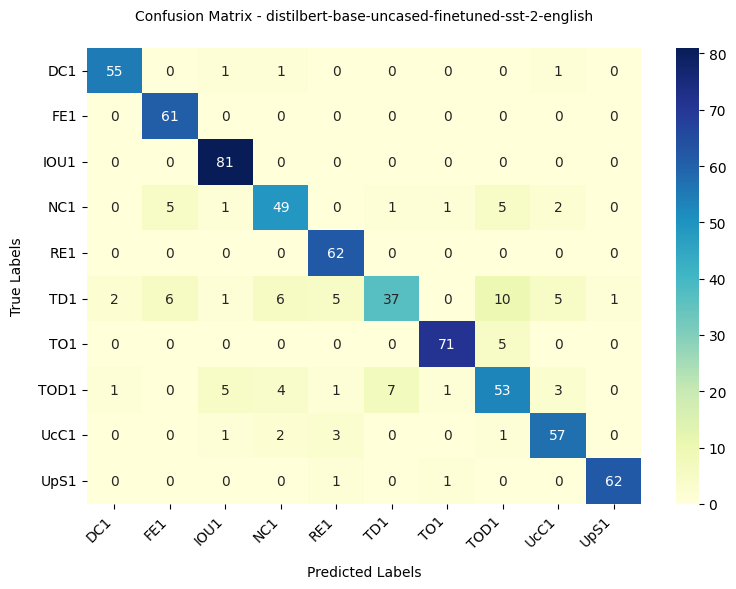

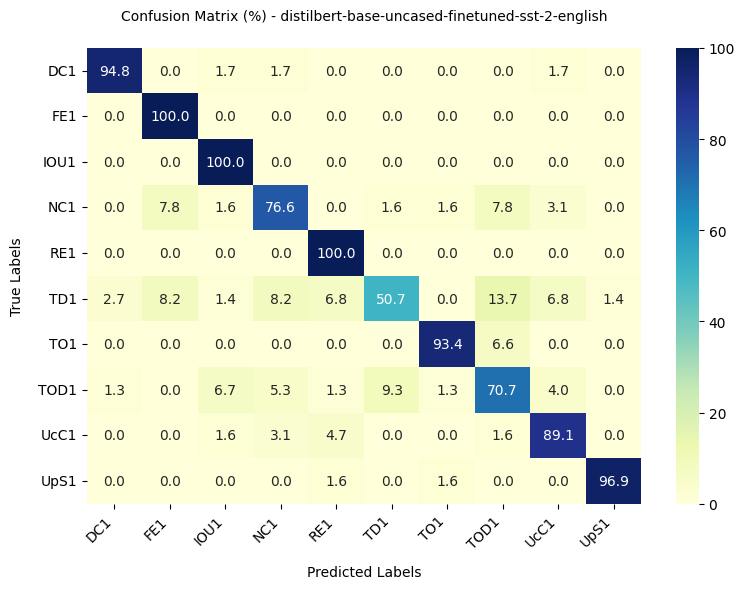

Class 0 - Precision: 0.9482758620689655, Recall: 0.9482758620689655, F1 Score: 0.9482758620689655, Accuracy: 0.9482758620689655
Class 1 - Precision: 0.8472222222222222, Recall: 1.0, F1 Score: 0.9172932330827067, Accuracy: 1.0
Class 2 - Precision: 0.9, Recall: 1.0, F1 Score: 0.9473684210526316, Accuracy: 1.0
Class 3 - Precision: 0.7903225806451613, Recall: 0.765625, F1 Score: 0.7777777777777778, Accuracy: 0.765625
Class 4 - Precision: 0.8611111111111112, Recall: 1.0, F1 Score: 0.9253731343283582, Accuracy: 1.0
Class 5 - Precision: 0.8222222222222222, Recall: 0.5068493150684932, F1 Score: 0.6271186440677966, Accuracy: 0.5068493150684932
Class 6 - Precision: 0.9594594594594594, Recall: 0.9342105263157895, F1 Score: 0.9466666666666668, Accuracy: 0.9342105263157895
Class 7 - Precision: 0.7162162162162162, Recall: 0.7066666666666667, F1 Score: 0.7114093959731544, Accuracy: 0.7066666666666667
Class 8 - Precision: 0.8382352941176471, Recall: 0.890625, F1 Score: 0.8636363636363636, Accuracy: 0.

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/tmp/ipykernel_710171/3784454423.py", line 20, in score
    y_pred = self.predict(X)
  File "/tmp/ipykernel_710171/3784454423.py", line 16, in predict
    outputs = self.model(X_tensor).logits
  File "/home/islab-ai/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/islab-ai/.local/lib/python3.8/site-packages/transformers/models/distilbert/modeling_di

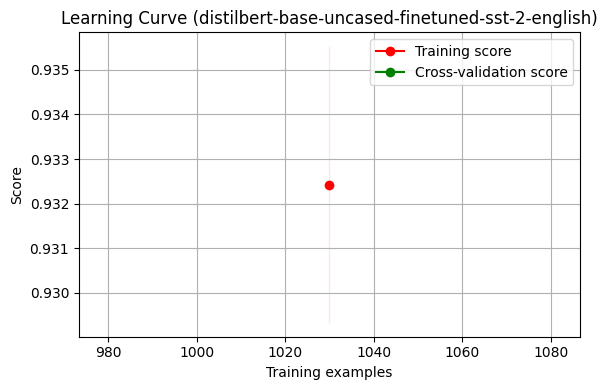

/tmp/ipykernel_710171/3999779995.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


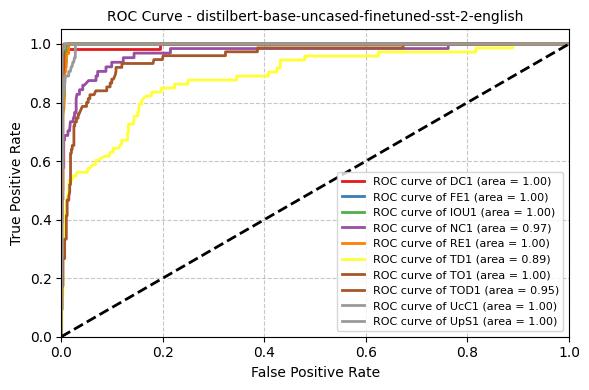


Training and evaluating model: intfloat/simlm-msmarco-reranker


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at intfloat/simlm-msmarco-reranker and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([1, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([1]) in the checkpoint and torch.Size([10]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Average Loss: 1.4904, Average Accuracy: 0.4804
Epoch 2, Average Loss: 0.6910, Average Accuracy: 0.7679
Epoch 3, Average Loss: 0.5052, Average Accuracy: 0.8289
Epoch 4, Average Loss: 0.4246, Average Accuracy: 0.8552
Epoch 5, Average Loss: 0.3668, Average Accuracy: 0.8771
Epoch 6, Average Loss: 0.3336, Average Accuracy: 0.8861
Epoch 7, Average Loss: 0.3176, Average Accuracy: 0.8931
Epoch 8, Average Loss: 0.2977, Average Accuracy: 0.9003
Epoch 9, Average Loss: 0.2732, Average Accuracy: 0.9081
Epoch 10, Average Loss: 0.2556, Average Accuracy: 0.9142
Testing - Accuracy: 0.8687315634218289
Testing - Precision: 0.8661004644068018
Testing - Recall 0.8687315634218289
Testing - F1 Score 0.8635494433647202


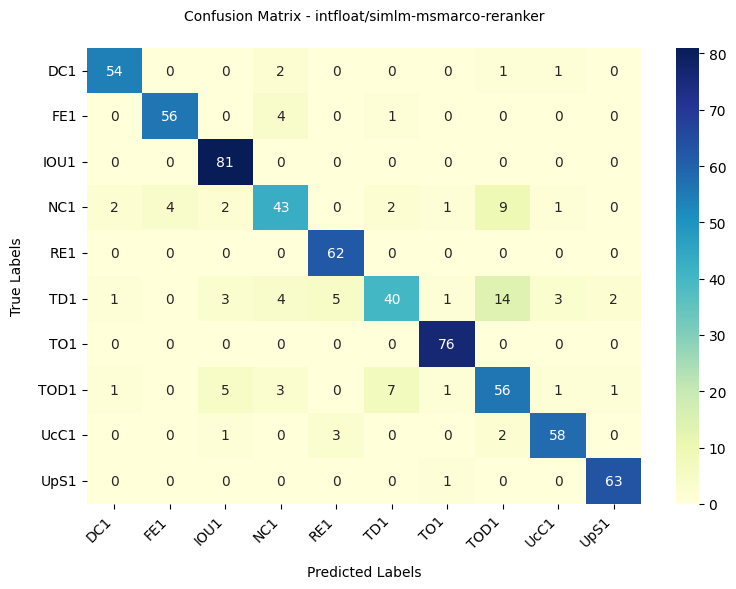

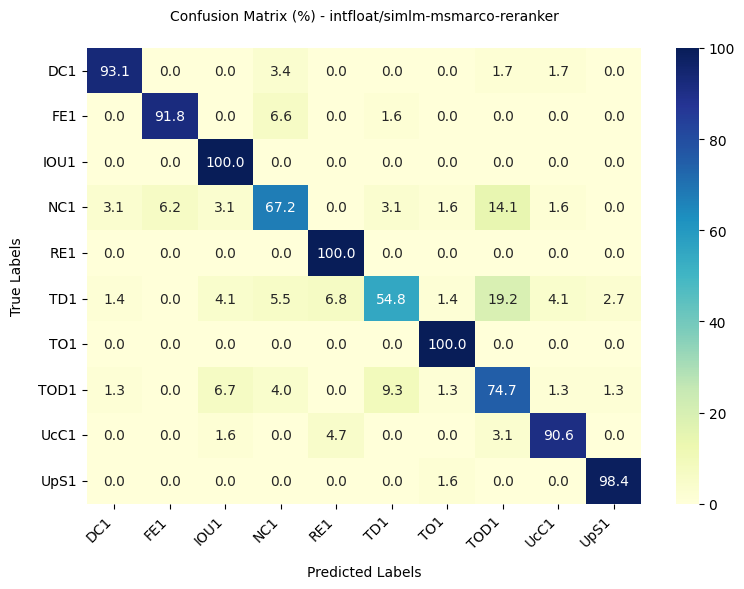

Class 0 - Precision: 0.9310344827586207, Recall: 0.9310344827586207, F1 Score: 0.9310344827586207, Accuracy: 0.9310344827586207
Class 1 - Precision: 0.9333333333333333, Recall: 0.9180327868852459, F1 Score: 0.9256198347107439, Accuracy: 0.9180327868852459
Class 2 - Precision: 0.8804347826086956, Recall: 1.0, F1 Score: 0.9364161849710984, Accuracy: 1.0
Class 3 - Precision: 0.7678571428571429, Recall: 0.671875, F1 Score: 0.7166666666666668, Accuracy: 0.671875
Class 4 - Precision: 0.8857142857142857, Recall: 1.0, F1 Score: 0.9393939393939393, Accuracy: 1.0
Class 5 - Precision: 0.8, Recall: 0.547945205479452, F1 Score: 0.6504065040650406, Accuracy: 0.547945205479452
Class 6 - Precision: 0.9500000000000001, Recall: 1.0, F1 Score: 0.9743589743589742, Accuracy: 1.0
Class 7 - Precision: 0.6829268292682927, Recall: 0.7466666666666667, F1 Score: 0.713375796178344, Accuracy: 0.7466666666666667
Class 8 - Precision: 0.90625, Recall: 0.90625, F1 Score: 0.90625, Accuracy: 0.90625
Class 9 - Precision:

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/tmp/ipykernel_710171/3784454423.py", line 20, in score
    y_pred = self.predict(X)
  File "/tmp/ipykernel_710171/3784454423.py", line 16, in predict
    outputs = self.model(X_tensor).logits
  File "/home/islab-ai/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/islab-ai/.local/lib/python3.8/site-packages/transformers/models/electra/modeling_elect

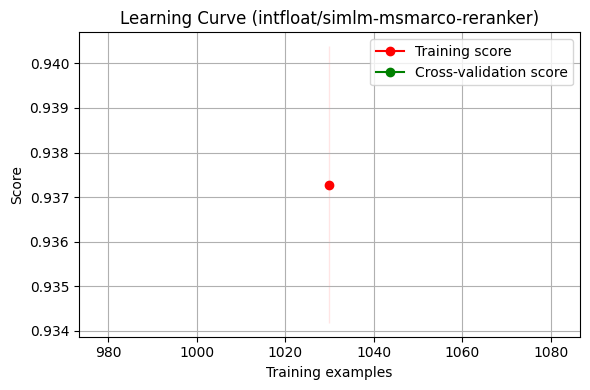

/tmp/ipykernel_710171/3999779995.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


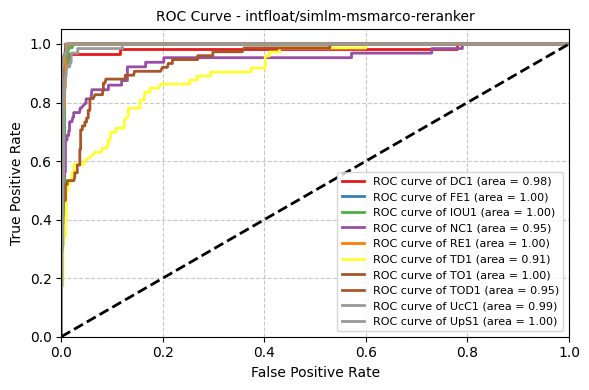


Training and evaluating model: FacebookAI/roberta-large-mnli


Some weights of the model checkpoint at FacebookAI/roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-large-mnli and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 1024]) in the checkpoint and torch.Size([10, 1024]) in the

Epoch 1, Average Loss: 1.3758, Average Accuracy: 0.5243
Epoch 2, Average Loss: 0.7687, Average Accuracy: 0.7321
Epoch 3, Average Loss: 0.5614, Average Accuracy: 0.8069
Epoch 4, Average Loss: 0.4774, Average Accuracy: 0.8344
Epoch 5, Average Loss: 0.4042, Average Accuracy: 0.8588
Epoch 6, Average Loss: 0.3765, Average Accuracy: 0.8684
Epoch 7, Average Loss: 0.3323, Average Accuracy: 0.8825
Epoch 8, Average Loss: 0.3213, Average Accuracy: 0.8889
Epoch 9, Average Loss: 0.2849, Average Accuracy: 0.9007
Epoch 10, Average Loss: 0.2847, Average Accuracy: 0.9018
Testing - Accuracy: 0.8746312684365781
Testing - Precision: 0.8683512338839553
Testing - Recall 0.8746312684365781
Testing - F1 Score 0.8701595075913329


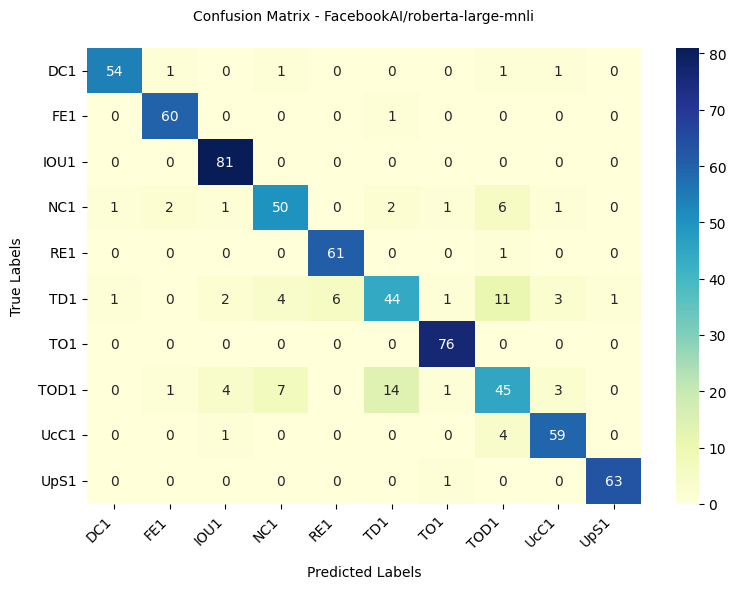

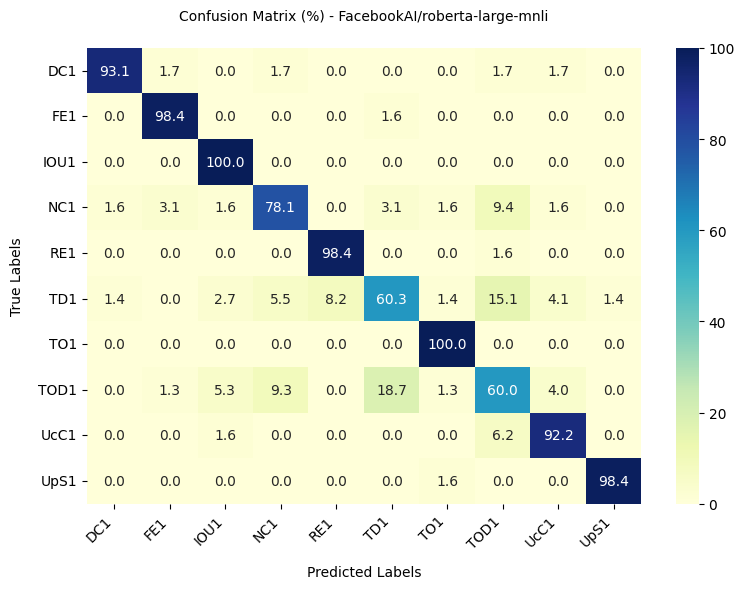

Class 0 - Precision: 0.9642857142857143, Recall: 0.9310344827586207, F1 Score: 0.9473684210526316, Accuracy: 0.9310344827586207
Class 1 - Precision: 0.9375, Recall: 0.9836065573770492, F1 Score: 0.96, Accuracy: 0.9836065573770492
Class 2 - Precision: 0.9101123595505618, Recall: 1.0, F1 Score: 0.9529411764705882, Accuracy: 1.0
Class 3 - Precision: 0.8064516129032258, Recall: 0.78125, F1 Score: 0.7936507936507936, Accuracy: 0.78125
Class 4 - Precision: 0.9104477611940298, Recall: 0.9838709677419355, F1 Score: 0.9457364341085271, Accuracy: 0.9838709677419355
Class 5 - Precision: 0.7213114754098361, Recall: 0.6027397260273972, F1 Score: 0.6567164179104478, Accuracy: 0.6027397260273972
Class 6 - Precision: 0.9500000000000001, Recall: 1.0, F1 Score: 0.9743589743589742, Accuracy: 1.0
Class 7 - Precision: 0.6617647058823529, Recall: 0.6, F1 Score: 0.6293706293706294, Accuracy: 0.6
Class 8 - Precision: 0.8805970149253731, Recall: 0.921875, F1 Score: 0.9007633587786259, Accuracy: 0.921875
Class 

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/tmp/ipykernel_710171/3784454423.py", line 20, in score
    y_pred = self.predict(X)
  File "/tmp/ipykernel_710171/3784454423.py", line 16, in predict
    outputs = self.model(X_tensor).logits
  File "/home/islab-ai/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/islab-ai/.local/lib/python3.8/site-packages/transformers/models/roberta/modeling_rober

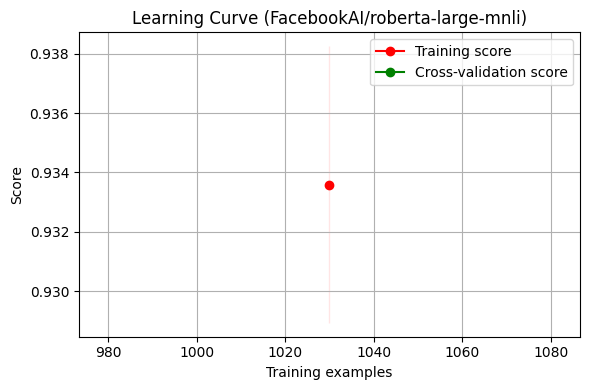

/tmp/ipykernel_710171/3999779995.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


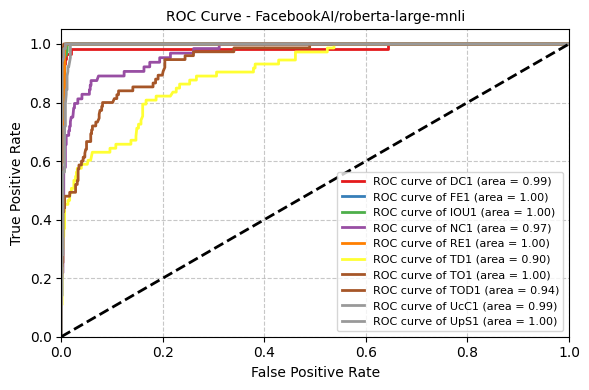


Training and evaluating model: FacebookAI/xlm-roberta-large-finetuned-conll03-english


Some weights of the model checkpoint at FacebookAI/xlm-roberta-large-finetuned-conll03-english were not used when initializing XLMRobertaForSequenceClassification: ['classifier.weight', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'classifier.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/xlm-roberta-large-finetuned-conll03-english and are newly initialized: ['classifier.dense.weight', 'classifier.out_pr

Epoch 1, Average Loss: 1.4160, Average Accuracy: 0.5105
Epoch 2, Average Loss: 0.7485, Average Accuracy: 0.7502
Epoch 3, Average Loss: 0.5505, Average Accuracy: 0.8157
Epoch 4, Average Loss: 0.4534, Average Accuracy: 0.8449
Epoch 5, Average Loss: 0.3951, Average Accuracy: 0.8653
Epoch 6, Average Loss: 0.3611, Average Accuracy: 0.8731
Epoch 7, Average Loss: 0.3359, Average Accuracy: 0.8839
Epoch 8, Average Loss: 0.3202, Average Accuracy: 0.8880
Epoch 9, Average Loss: 0.2978, Average Accuracy: 0.8972
Epoch 10, Average Loss: 1.1813, Average Accuracy: 0.5482


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing - Accuracy: 0.0943952802359882
Testing - Precision: 0.008910468930830745
Testing - Recall 0.0943952802359882
Testing - F1 Score 0.01628382192750201


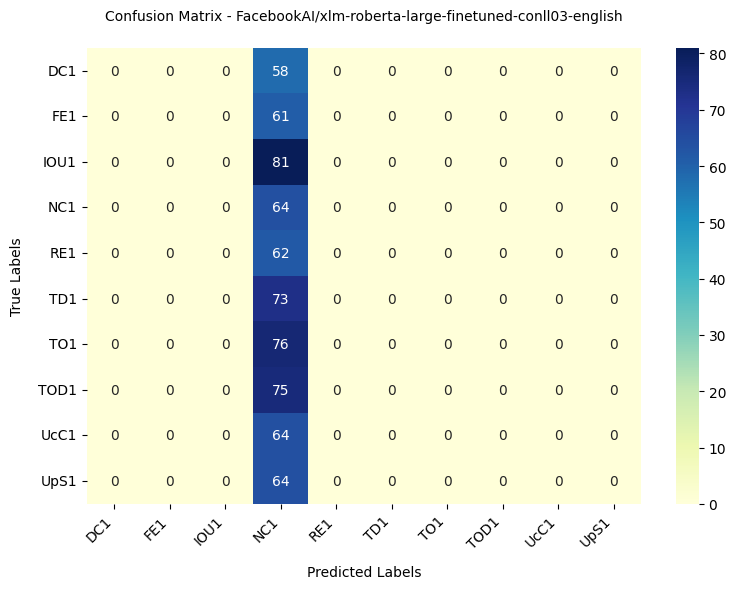

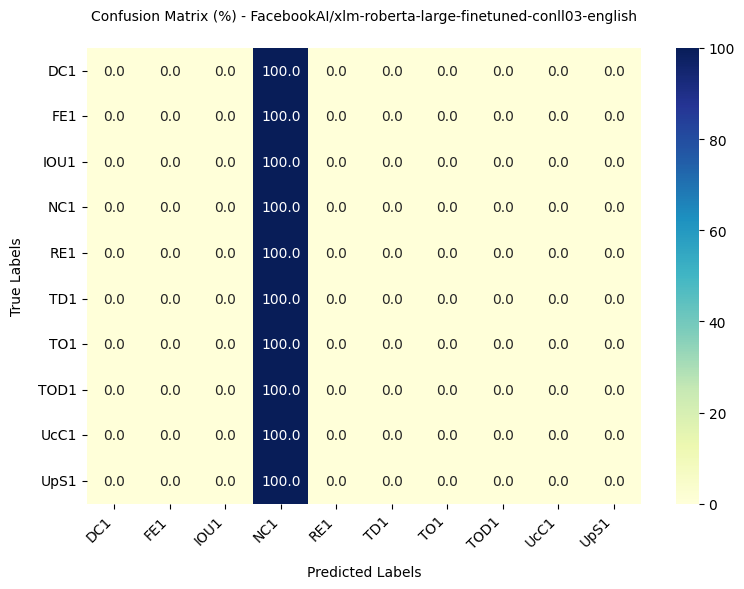

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined a

Class 0 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0, Accuracy: 0.0
Class 1 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0, Accuracy: 0.0
Class 2 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0, Accuracy: 0.0
Class 3 - Precision: 0.0943952802359882, Recall: 1.0, F1 Score: 0.1725067385444744, Accuracy: 1.0
Class 4 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0, Accuracy: 0.0
Class 5 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0, Accuracy: 0.0
Class 6 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0, Accuracy: 0.0
Class 7 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0, Accuracy: 0.0
Class 8 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0, Accuracy: 0.0
Class 9 - Precision: 0.0, Recall: 0.0, F1 Score: 0.0, Accuracy: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/tmp/ipykernel_710171/3784454423.py", line 20, in score
    y_pred = self.predict(X)
  File "/tmp/ipykernel_710171/3784454423.py", line 16, in predict
    outputs = self.model(X_tensor).logits
  File "/home/islab-ai/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/islab-ai/.local/lib/python3.8/site-packages/transformers/models/roberta/modeling_rober

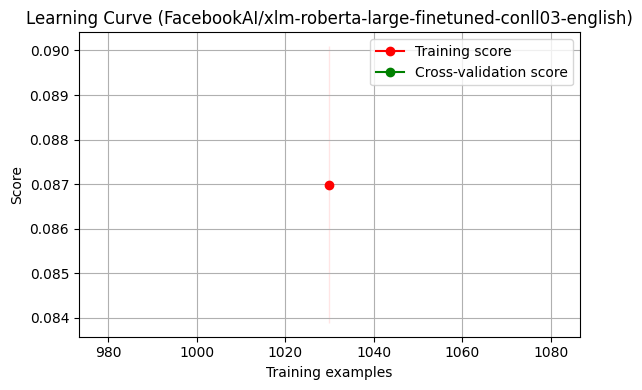

/tmp/ipykernel_710171/3999779995.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


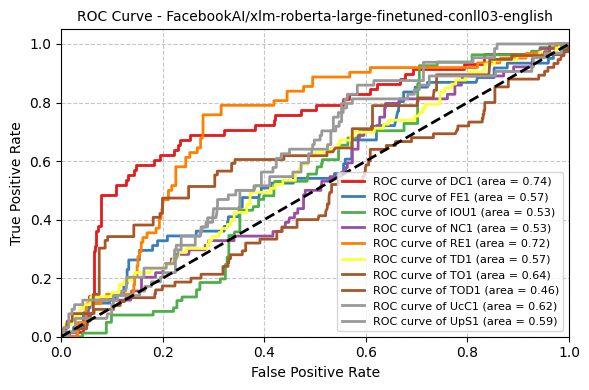


Training and evaluating model: openai-community/roberta-large-openai-detector


Some weights of the model checkpoint at openai-community/roberta-large-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at openai-community/roberta-large-openai-detector and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([2, 1024]) in the checkpoint

Epoch 1, Average Loss: 1.2938, Average Accuracy: 0.5497
Epoch 2, Average Loss: 0.6194, Average Accuracy: 0.7902
Epoch 3, Average Loss: 0.4860, Average Accuracy: 0.8369
Epoch 4, Average Loss: 0.4133, Average Accuracy: 0.8587
Epoch 5, Average Loss: 0.3730, Average Accuracy: 0.8704
Epoch 6, Average Loss: 0.3399, Average Accuracy: 0.8809
Epoch 7, Average Loss: 0.3560, Average Accuracy: 0.8767
Epoch 8, Average Loss: 0.3257, Average Accuracy: 0.8841
Epoch 9, Average Loss: 0.3054, Average Accuracy: 0.8910
Epoch 10, Average Loss: 0.2972, Average Accuracy: 0.8931
Testing - Accuracy: 0.8657817109144543
Testing - Precision: 0.8599757058095214
Testing - Recall 0.8657817109144543
Testing - F1 Score 0.8583148056453763


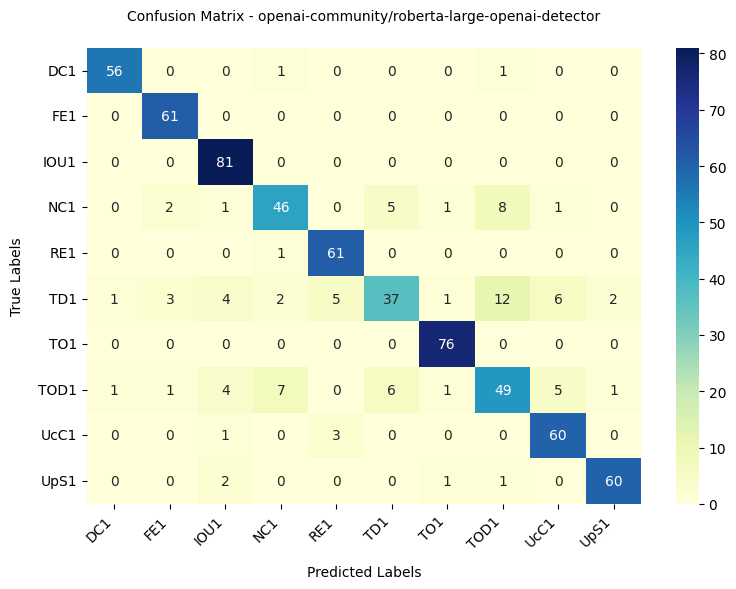

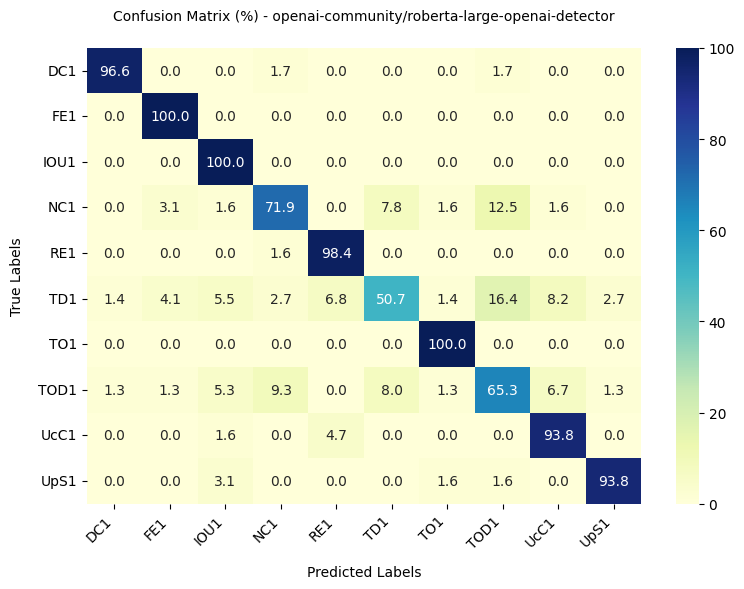

Class 0 - Precision: 0.9655172413793104, Recall: 0.9655172413793104, F1 Score: 0.9655172413793104, Accuracy: 0.9655172413793104
Class 1 - Precision: 0.9104477611940298, Recall: 1.0, F1 Score: 0.953125, Accuracy: 1.0
Class 2 - Precision: 0.8709677419354839, Recall: 1.0, F1 Score: 0.9310344827586207, Accuracy: 1.0
Class 3 - Precision: 0.8070175438596491, Recall: 0.71875, F1 Score: 0.7603305785123967, Accuracy: 0.71875
Class 4 - Precision: 0.8840579710144928, Recall: 0.9838709677419355, F1 Score: 0.9312977099236642, Accuracy: 0.9838709677419355
Class 5 - Precision: 0.7708333333333334, Recall: 0.5068493150684932, F1 Score: 0.6115702479338844, Accuracy: 0.5068493150684932
Class 6 - Precision: 0.9500000000000001, Recall: 1.0, F1 Score: 0.9743589743589742, Accuracy: 1.0
Class 7 - Precision: 0.6901408450704225, Recall: 0.6533333333333333, F1 Score: 0.6712328767123288, Accuracy: 0.6533333333333333
Class 8 - Precision: 0.8333333333333334, Recall: 0.9375, F1 Score: 0.8823529411764706, Accuracy: 0

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/tmp/ipykernel_710171/3784454423.py", line 20, in score
    y_pred = self.predict(X)
  File "/tmp/ipykernel_710171/3784454423.py", line 16, in predict
    outputs = self.model(X_tensor).logits
  File "/home/islab-ai/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/islab-ai/.local/lib/python3.8/site-packages/transformers/models/roberta/modeling_rober

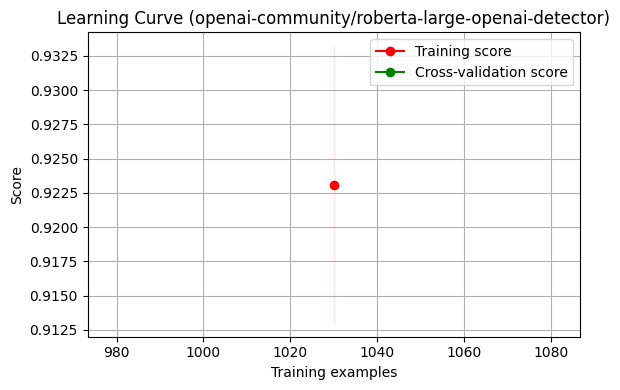

/tmp/ipykernel_710171/3999779995.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


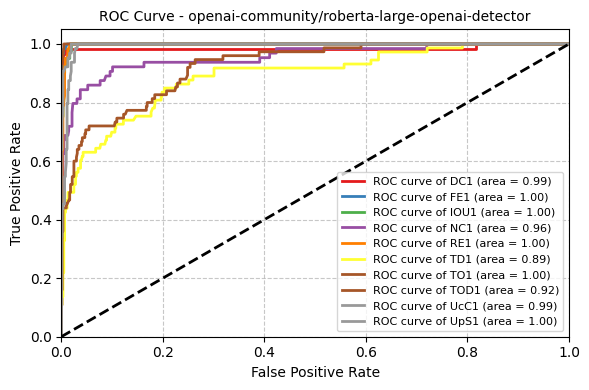


Training and evaluating model: openai-community/roberta-base-openai-detector


Some weights of the model checkpoint at openai-community/roberta-base-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at openai-community/roberta-base-openai-detector and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([2, 768]) in the checkpoint an

Epoch 1, Average Loss: 1.4356, Average Accuracy: 0.4853
Epoch 2, Average Loss: 0.6977, Average Accuracy: 0.7623
Epoch 3, Average Loss: 0.5182, Average Accuracy: 0.8268
Epoch 4, Average Loss: 0.4356, Average Accuracy: 0.8520
Epoch 5, Average Loss: 0.3798, Average Accuracy: 0.8711
Epoch 6, Average Loss: 0.3410, Average Accuracy: 0.8826
Epoch 7, Average Loss: 0.3180, Average Accuracy: 0.8932
Epoch 8, Average Loss: 0.2990, Average Accuracy: 0.8979
Epoch 9, Average Loss: 0.2799, Average Accuracy: 0.9029
Epoch 10, Average Loss: 0.2657, Average Accuracy: 0.9089
Testing - Accuracy: 0.8716814159292036
Testing - Precision: 0.8694785527354203
Testing - Recall 0.8716814159292036
Testing - F1 Score 0.8654493543634427


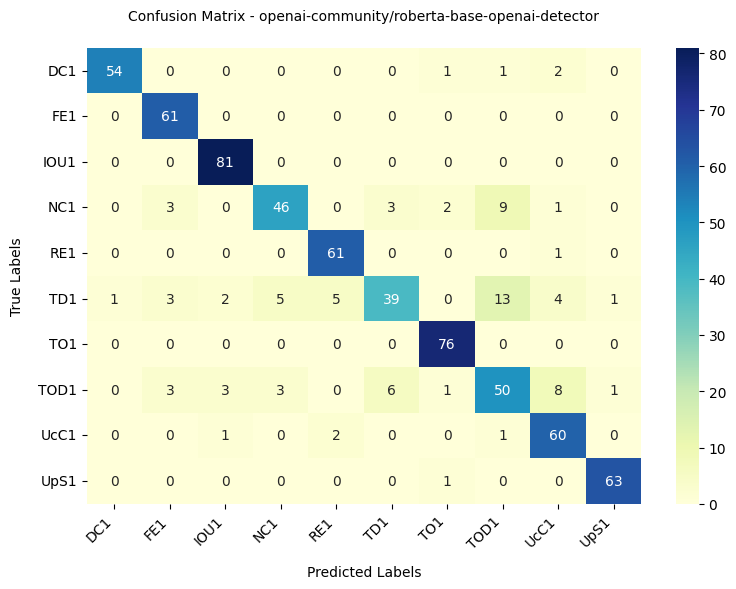

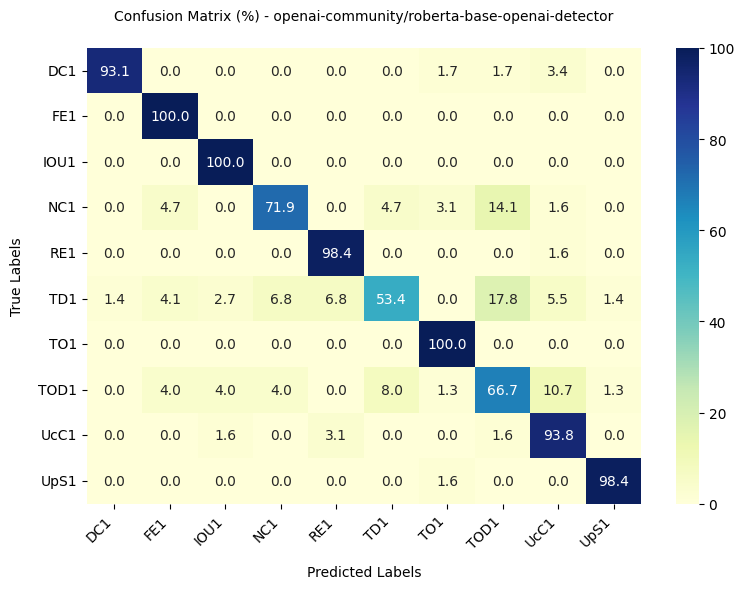

Class 0 - Precision: 0.9818181818181818, Recall: 0.9310344827586207, F1 Score: 0.9557522123893805, Accuracy: 0.9310344827586207
Class 1 - Precision: 0.8714285714285714, Recall: 1.0, F1 Score: 0.9312977099236641, Accuracy: 1.0
Class 2 - Precision: 0.9310344827586207, Recall: 1.0, F1 Score: 0.9642857142857143, Accuracy: 1.0
Class 3 - Precision: 0.8518518518518519, Recall: 0.71875, F1 Score: 0.7796610169491525, Accuracy: 0.71875
Class 4 - Precision: 0.8970588235294118, Recall: 0.9838709677419355, F1 Score: 0.9384615384615386, Accuracy: 0.9838709677419355
Class 5 - Precision: 0.8125, Recall: 0.5342465753424658, F1 Score: 0.6446280991735538, Accuracy: 0.5342465753424658
Class 6 - Precision: 0.9382716049382714, Recall: 1.0, F1 Score: 0.9681528662420383, Accuracy: 1.0
Class 7 - Precision: 0.6756756756756757, Recall: 0.6666666666666666, F1 Score: 0.6711409395973154, Accuracy: 0.6666666666666666
Class 8 - Precision: 0.7894736842105263, Recall: 0.9375, F1 Score: 0.8571428571428572, Accuracy: 0.9

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/tmp/ipykernel_710171/3784454423.py", line 20, in score
    y_pred = self.predict(X)
  File "/tmp/ipykernel_710171/3784454423.py", line 16, in predict
    outputs = self.model(X_tensor).logits
  File "/home/islab-ai/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/islab-ai/.local/lib/python3.8/site-packages/transformers/models/roberta/modeling_rober

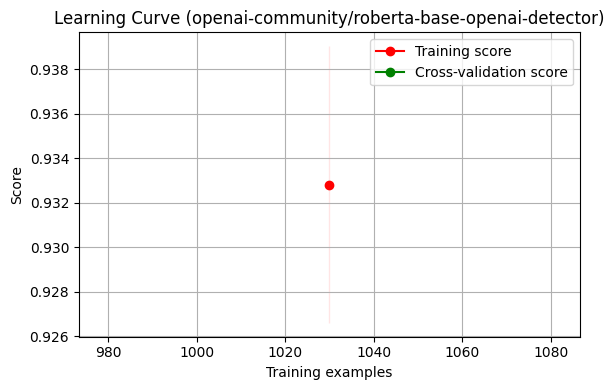

/tmp/ipykernel_710171/3999779995.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


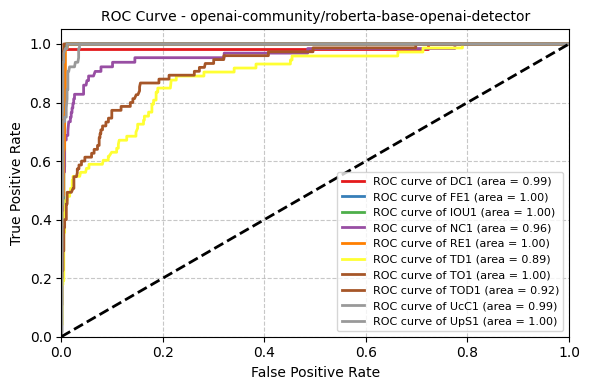

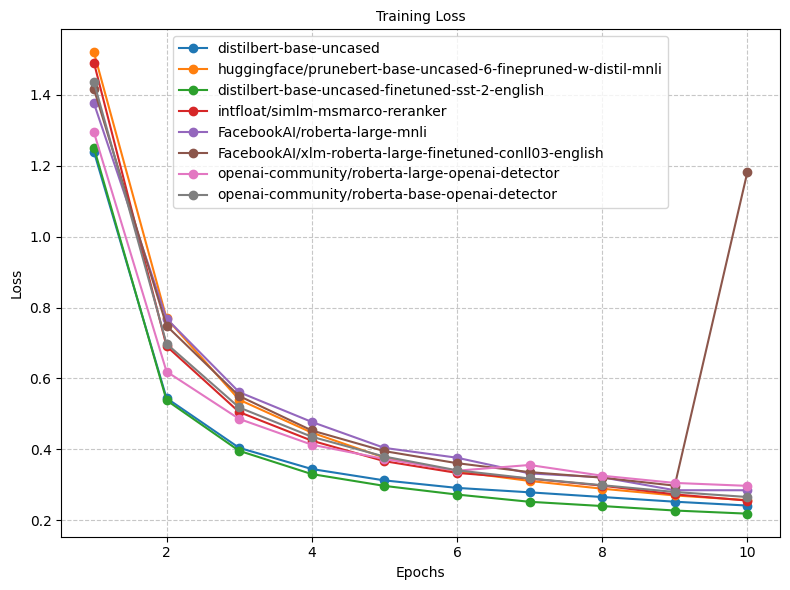

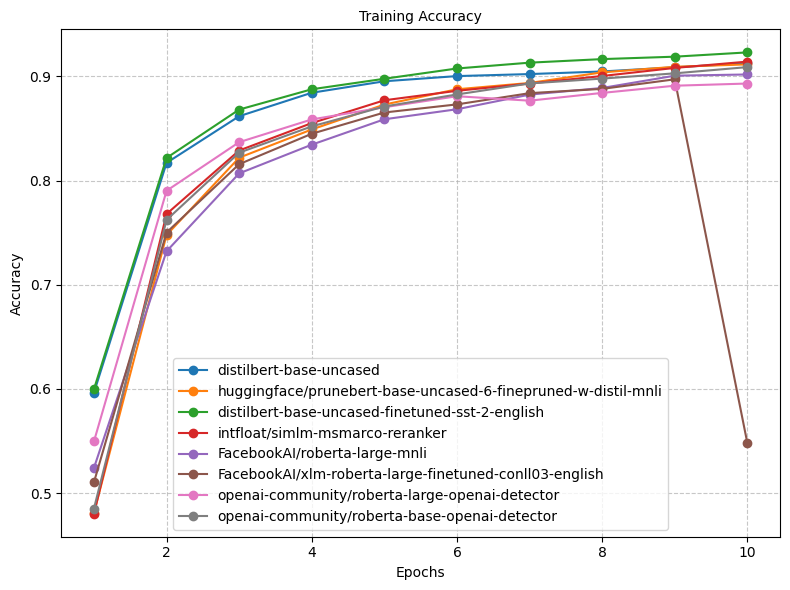

In [3]:
import os
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.preprocessing import LabelEncoder
import numpy as np 
import seaborn as sns
    
    
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

    
    
# Specify the models
models_to_train = [
    "distilbert-base-uncased",
    "huggingface/prunebert-base-uncased-6-finepruned-w-distil-mnli",
    "distilbert-base-uncased-finetuned-sst-2-english", 
    "intfloat/simlm-msmarco-reranker", 
    "FacebookAI/roberta-large-mnli",
    "FacebookAI/xlm-roberta-large-finetuned-conll03-english", 
    "openai-community/roberta-large-openai-detector", 
    "openai-community/roberta-base-openai-detector"
]

# Load the JSON data
with open('Benchmark_Solidity_Balanced.json', 'r') as json_file:
    data = json.load(json_file)


# Extract input features and output labels
X = [' '.join(str(value) for value in item.values()) if isinstance(item, dict) else str(item) for item in data]
y = [item['y'] for item in data]

# Convert labels to numerical format (assuming they are strings)
label_to_index = {label: idx for idx, label in enumerate(set(y))}
num_labels = len(label_to_index)


# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# Dictionaries to store training losses and accuracies for each model
all_train_losses = {}
all_train_accuracies = {}

for model_name in models_to_train:
    print(f"Training and evaluating model: {model_name}")

    # Load the model and tokenizer
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=num_classes,
        problem_type="single_label_classification", 
        ignore_mismatched_sizes=True
    )
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Move the model to the GPU
    device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
    model = model.to(device)

    # Tokenize the input text
    max_length = 256
    X_encoded = tokenizer(X, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt').to(device)

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded['input_ids'], y_encoded, test_size=0.05, random_state=42)

    # Convert labels to tensors for multi-class classification
    y_train = torch.tensor(y_train, dtype=torch.long).to(device)
    y_test = torch.tensor(y_test, dtype=torch.long).to(device)
    
    # Create data loaders
    train_dataset = TensorDataset(X_train, y_train)
    train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
    test_dataset = TensorDataset(X_test, y_test)
    test_dataloader = DataLoader(test_dataset, batch_size=4)

    # Set up optimizer and loss function (CrossEntropyLoss) for multi-class classification
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
    loss_fn = torch.nn.CrossEntropyLoss()

    # Training loop
    model.train()
    epochs = 10

    # Variables for early stopping
    best_loss = float('inf')
    early_stop_counter = 0
    patience = 3  # Number of epochs to wait for improvement

    # Lists to store loss and accuracy values
    train_losses = []
    train_accuracies = []

    for epoch in range(epochs):
        total_loss = 0
        total_accuracy = 0

        for batch in train_dataloader:
            input_ids, labels = batch
            
            # Clear the CUDA cache to free up memory
            torch.cuda.empty_cache()
            
            optimizer.zero_grad()
            outputs = model(input_ids)
            logits = outputs.logits
            loss = loss_fn(logits, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            # Use argmax to get the predicted class
            y_pred_batch = torch.argmax(logits, dim=1)
            accuracy = accuracy_score(labels.cpu().numpy(), y_pred_batch.cpu().numpy())
            total_accuracy += accuracy

        # Calculate the average loss and accuracy for the epoch
        average_loss = total_loss / len(train_dataloader)
        average_accuracy = total_accuracy / len(train_dataloader)

        print(f"Epoch {epoch + 1}, Average Loss: {average_loss:.4f}, Average Accuracy: {average_accuracy:.4f}")

        # Append loss and accuracy values to the lists
        train_losses.append(average_loss)
        train_accuracies.append(average_accuracy)

        # Check for early stopping
        if average_loss < best_loss:
            best_loss = average_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print("Early stopping...")
                break

    # Save the trained model
    output_dir = f"./model/{model_name}_trained_model"
    os.makedirs(output_dir, exist_ok=True)
    model.save_pretrained(output_dir)
    tokenizer.save_pretrained(output_dir)

    # Store the training losses and accuracies for this model
    all_train_losses[model_name] = train_losses
    all_train_accuracies[model_name] = train_accuracies

    # Evaluation on testing data
    model.eval()
    y_true = []
    y_pred = []
    
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids, labels = batch
            outputs = model(input_ids)
            logits = outputs.logits
            y_true.extend(labels.cpu().numpy())
            y_pred = np.append(y_pred, torch.argmax(logits, dim=1).cpu().numpy())
    
    # Convert predicted labels back to original labels
    y_pred_labels = label_encoder.inverse_transform(y_pred.astype(int))
    
    # Convert true labels back to original labels
    y_true_labels = label_encoder.inverse_transform(y_true)
    
    # Calculate precision, recall, and F1 for each class
    accuracy = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average = 'weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average = 'weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average = 'weighted')
    print(f"Testing - Accuracy:", accuracy)   
    print(f"Testing - Precision:", precision)
    print(f"Testing - Recall", recall)
    print(f"Testing - F1 Score", f1)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    # Get the unique labels
    unique_labels = label_encoder.classes_

    # Create tick labels
    tick_labels = [label for label in unique_labels] 


    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=tick_labels, yticklabels=tick_labels, cbar=True)
    plt.xlabel("Predicted Labels", fontsize=10, labelpad=10)
    plt.ylabel("True Labels", fontsize=10, labelpad=10)
    plt.title(f"Confusion Matrix - {model_name}", fontsize=10, pad=20)

    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.show()

    # Percentage Confusion Matrix
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100.0
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percentage, annot=True, fmt=".1f", cmap="YlGnBu", xticklabels=tick_labels, yticklabels=tick_labels, cbar=True)
    plt.xlabel("Predicted Labels", fontsize=10, labelpad=10)
    plt.ylabel("True Labels", fontsize=10, labelpad=10)
    plt.title(f"Confusion Matrix (%) - {model_name}", fontsize=10, pad=20)

    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.show()


    # Calculate and print precision, recall, and F1 for each class
    for i in range(num_classes):
        precision = precision_score(y_true, y_pred, labels=[i], average='weighted')
        recall = recall_score(y_true, y_pred, labels=[i], average='weighted')
        f1 = f1_score(y_true, y_pred, labels=[i], average='weighted')

        # Calculate accuracy for each class
        true_positive = cm[i, i]
        total_instances = cm[i].sum()
        class_accuracy = true_positive / total_instances
        
        print(f"Class {i} - Precision: {precision}, Recall: {recall}, F1 Score: {f1}, Accuracy: {class_accuracy}")
        
    # Learning curve 
    model_wrapper = PyTorchClassifierWrapper(model, device)

    # Plot learning curve
    plot_learning_curve(
        model_wrapper, 
        f"Learning Curve ({model_name})", 
        X_train.cpu().numpy(), 
        y_train.cpu().numpy(), 
        cv=5
    )
    plt.tight_layout()
    plt.show()
    

    # ROC Curve        
    # First, ensure the model is in evaluation mode
    model.eval()

    # Move X_test to the appropriate device and convert to the right format
    X_test_tensor = X_test.to(device)

    # Get predictions
    with torch.no_grad():
        y_pred_proba = model(X_test_tensor).logits

    # Move the predictions to CPU and convert to numpy
    y_pred_proba = y_pred_proba.cpu().numpy()

    # Now plot the ROC curve
    plot_roc_curve(y_test.cpu().numpy(), y_pred_proba, label_encoder, model_name)    
    
    
    print()

# Training Loss Plot
plt.figure(figsize=(8, 6))
for model_name, losses in all_train_losses.items():
    plt.plot(range(1, len(losses) + 1), losses, label=model_name, marker='o')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Training Loss', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Training Accuracy Plot
plt.figure(figsize=(8, 6))
for model_name, accuracies in all_train_accuracies.items():
    plt.plot(range(1, len(accuracies) + 1), accuracies, label=model_name, marker='o')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Training Accuracy', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [4]:
print ('hi') 

hi
